In [1]:
#Bibliotecas necessarias 
import pandas as pd
import numpy as np
import re 

In [2]:
#Abrindo arquivo CSV
SharkAttack = pd.read_csv('attacks.csv', encoding='latin1')
SharkAttack

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
SharkAttack.head(10) #visualização para conhecer um pouco os dados

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,...,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,...,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,...,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,...,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


In [4]:
SharkAttack.info() #Verifica quantidade de linha não nula em cada coluna e o tipo da coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [5]:
SharkAttack.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
SharkAttack = SharkAttack.drop(columns=['Unnamed: 22','Unnamed: 23'])#Removendo as duas colunas que são nulas

In [81]:
SharkAttack = SharkAttack.drop(columns=['pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2'])#Removendo as duas colunas que não vão ser utilizadas

In [82]:
SharkAttack

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,Mes
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6303.0,Jun
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",6302.0,Jun
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301.0,Jun
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300.0,Jun
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299.0,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",6.0,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",5.0,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",4.0,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",3.0,NaN


In [8]:
SharkAttack.duplicated() #verifica se tem muita linha duplicada

0        False
1        False
2        False
3        False
4        False
         ...  
25718     True
25719     True
25720     True
25721     True
25722    False
Length: 25723, dtype: bool

In [9]:
SharkAttack = SharkAttack.drop_duplicates(keep='last',ignore_index=True) #elimina as linhas duplicadas

In [10]:
SharkAttack

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
SharkAttack = SharkAttack.dropna(thresh =  0.5*len(SharkAttack.columns)) #Elimina as linhas que não estao 50% preenchidas

In [12]:
SharkAttack

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [13]:
# Pergunta: Os ataques de tubaroes sao fatais?

In [14]:
SharkAttack['Fatal (Y/N)'].value_counts() #conta quantas fileiras tem com cada tipo de dado

N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal (Y/N), dtype: int64

In [15]:
# Percebemos que tem 5 dados com espaço antes do N
# Um com 2017 que tem que ser alterado para UNKNOWN
# Um com a letra M que deve ser erro de digitação vamos subistituir por N

In [16]:
SharkAttack['Fatal (Y/N)'] = SharkAttack['Fatal (Y/N)'].str.replace("\W", "")#tira o espaço antes do N

C:\Users\flavi\AppData\Local\Temp/ipykernel_9592/2024192927.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  SharkAttack['Fatal (Y/N)'] = SharkAttack['Fatal (Y/N)'].str.replace("\W", "")#tira o espaço antes do N
C:\Users\flavi\AppData\Local\Temp/ipykernel_9592/2024192927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SharkAttack['Fatal (Y/N)'] = SharkAttack['Fatal (Y/N)'].str.replace("\W", "")#tira o espaço antes do N


In [17]:
SharkAttack['Fatal (Y/N)'].value_counts() #conta quantas fileiras tem com cada tipo de dado

N          4301
Y          1388
UNKNOWN      71
M             1
2017          1
y             1
Name: Fatal (Y/N), dtype: int64

In [18]:
SharkAttack['Fatal (Y/N)'] = SharkAttack['Fatal (Y/N)'].str.replace("M", "N")#Troca o M por N

C:\Users\flavi\AppData\Local\Temp/ipykernel_9592/1219465660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SharkAttack['Fatal (Y/N)'] = SharkAttack['Fatal (Y/N)'].str.replace("M", "N")#Troca o M por N


In [19]:
SharkAttack['Fatal (Y/N)'].value_counts() #conta quantas fileiras tem com cada tipo de dado

N          4302
Y          1388
UNKNOWN      71
2017          1
y             1
Name: Fatal (Y/N), dtype: int64

In [20]:
SharkAttack['Fatal (Y/N)'] = SharkAttack['Fatal (Y/N)'].str.replace("2017", "UNKNOWN")#Troca o 2017 por UNKNOWN

C:\Users\flavi\AppData\Local\Temp/ipykernel_9592/4066768284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SharkAttack['Fatal (Y/N)'] = SharkAttack['Fatal (Y/N)'].str.replace("2017", "UNKNOWN")#Troca o 2017 por UNKNOWN


In [21]:
SharkAttack['Fatal (Y/N)'] = SharkAttack['Fatal (Y/N)'].str.replace("y", "Y")#Troca o 2017 por UNKNOWN

C:\Users\flavi\AppData\Local\Temp/ipykernel_9592/463352231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SharkAttack['Fatal (Y/N)'] = SharkAttack['Fatal (Y/N)'].str.replace("y", "Y")#Troca o 2017 por UNKNOWN


In [22]:
fatal_values = SharkAttack['Fatal (Y/N)'].value_counts() #conta quantas fileiras tem com cada tipo de dadoSharkAttack
fatal_values

N          4302
Y          1389
UNKNOWN      72
Name: Fatal (Y/N), dtype: int64

In [34]:
pd.options.display.max_columns = 30

In [35]:
SharkAttack[SharkAttack['Fatal (Y/N)'] == 'UNKNOWN']


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
624,2013.09.08,08-Sep-2013,2013.0,Unprovoked,USA,South Carolina,"St. Helena Island, Beaufort County",NaN,female,F,NaN,No details,UNKNOWN,NaN,NaN,"WIS-TV, 9/9/2013",2013.09.08-St-Helena.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.09.08,2013.09.08,5679.0
786,2012.06.10,10-Jun-2012,2012.0,Provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,M,57,Lower left leg injured PROVOKED ACCIDENT,UNKNOWN,Morning,"Blue shark, 2.5m","D. Puddo, 6/11/2012",2012.06.10-Zara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.06.10,2012.06.10,5517.0
1270,2008.04.20.a,20-Apr-2008,2008.0,Unprovoked,AUSTRALIA,New South Wales,Crescent Head,NaN,Jamie Adlington,M,NaN,NaN,UNKNOWN,NaN,"Tiger shark, 2.3m","T. Peake, GSAF",2008.04.20.a-Adlington.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.04.20.a,2008.04.20.a,5033.0
2250,1997.06.07,07-Jun-1997,1997.0,Unprovoked,BRAZIL,Rio de Janeiro,"Copacabana, Rio de Janeiro",Bathing,José Luiz Lipiani,M,NaN,NaN,UNKNOWN,NaN,NaN,"Globo, 6/9/1997",1997.06.07-NV-Lipiani.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1997.06.07,1997.06.07,4053.0
2260,1997.02.21,21-Feb-1997,1997.0,Unprovoked,USA,Hawaii,"Sunset Beach, O'ahu",NaN,Gersome Perreno,M,NaN,No details,UNKNOWN,NaN,NaN,G. Balazs,1997.02.21-NV-Perreno.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1997.02.21,1997.02.21,4043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,1617.00.00.R,Reported 1617,1617.0,Unprovoked,INDIA,West Bengal,Ganges Delta,NaN,Indian people,NaN,NaN,NaN,UNKNOWN,NaN,NaN,"H. Edwards, p.31, citing Samuel Purchas",1617.00.00-Purchas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1617.00.00.R,1617.00.00.R,136.0
6169,1595.00.00,1595,1595.0,Unprovoked,INDIA,Kerala,River Cochin,Ship lay at anchor & man was working on its ru...,male,M,NaN,"Leg severed mid-thigh, hand severed, arm above...",UNKNOWN,NaN,NaN,The Voyage of John Huyghen van Linschoten,1595.00.00-Cochin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1595.00.00,1595.00.00,134.0
6171,1555.00.00,1555,1555.0,Unprovoked,NaN,NaN,NaN,Swimming,male,M,NaN,NaN,UNKNOWN,NaN,NaN,Olaus Magnus,1555.00.00 - Olaus Magnus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1555.00.00,1555.00.00,132.0
6172,1554.00.00,Ca. 1554,1554.0,Unprovoked,FRANCE,Nice & Marseilles,NaN,NaN,males (wearing armor),M,NaN,NaN,UNKNOWN,NaN,Possibly white sharks,G. Rondelet,1554.00.00-Rondelet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1554.00.00,1554.00.00,131.0


In [56]:
print('Podemos concluir que de',len(SharkAttack),'ataques,', fatal_values['N'],'não foram fatais! Ou seja apenas', 100 - fatal_values['N']/  len(SharkAttack)* 100, '% são fatais.')

Podemos concluir que de 6302 ataques, 4302 não foram fatais! Ou seja apenas 31.735956839098705 % são fatais.


In [57]:
SharkAttackFatal = SharkAttack[SharkAttack['Fatal (Y/N)'] == 'Y']
SharkAttackFatal

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Mes
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,Jun
58,2017.11.30.a,30-Nov-2017,2017.0,Unprovoked,COSTA RICA,Cocos Island,Manuelita,Scuba diving,Rohina Bhandari,F,49,FATAL,Y,NaN,"Tiger shark, female",R. Arauz,2017.11.30.a-Bhandari.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.30.a,2017.11.30.a,6245.0,Nov
59,2017.11.25.R,Reported 25-Nov-2017,2017.0,Sea Disaster,LIBYA,NaN,Gars Garabulli,2 boats capsized,31 migrants,NaN,NaN,FATAL,Y,NaN,Some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",2017.11.25.R-Libya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.25.R,2017.11.25.R,6244.0,Nov
64,2017.11.04,04-Nov-2017,2017.0,Unprovoked,CUBA,Holquin Province,Guardalavaca Beach,Night bathing,Jesús Cabrera González,M,22,FATAL,Y,23h30,Tiger shark,TrackingSharks.com,2017.11.04-Cuba.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.04,2017.11.04,6239.0,Nov
91,2017.09.03.b,03-Sep-2017,2017.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Dyer Island,"Swimming, poaching abalone",Sivuyile Xelela,M,NaN,FATAL,Y,Morning,NaN,"All Africa, 10/11/2017",2017.09.03.b-Xelela.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.03.b,2017.09.03.b,6212.0,Sep
144,2017.05.06,05-May-2017,2017.0,Unprovoked,MEXICO,Baja California Sur,"Los Arbolitos, Cabo Pulmo",Snorkeling,Andres Rozada,M,33,FATAL,Y,17h00,NaN,J. Rozada,2017.05.06-Rozada.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.06,2017.05.06,6159.0,May
149,2017.04.29.a,29-Apr-2017,2017.0,Unprovoked,REUNION,Saint-Leu,Pointe au Sal,Body boarding,Adrien Dubosc,M,28,FATAL,Y,11h15,NaN,"Clicanoo, 4/29/2017",2017.04.29.a-Dubosc.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.29.a,2017.04.29.a,6154.0,Apr
155,2017.04.17.a,17-Apr-2017,2017.0,Unprovoked,AUSTRALIA,Western Australia,Kelpies near Wylie Bay,Surfing,Laeticia Brouwer,F,17,FATAL,Y,16h00,White shark,"B. Myatt, GSAF",2017.04.17.a Brouwer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.17.a,2017.04.17.a,6148.0,Apr
174,2017.02.21,21-Feb-2017,2017.0,Unprovoked,REUNION,Saint-Andre,NaN,Body boarding,Alexandre Naussance,M,26,Fatal,Y,09h30,NaN,"Surfline, 2/21/2017",2017.02.21-Naussance.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.02.21,2017.02.21,6129.0,Feb
221,2016.09.06,06-Sep-2016,2016.0,Unprovoked,NEW CALEDONIA,North Province,Koumac,Kite surfing,David Jewell,M,50,FATAL,Y,15h40,NaN,"TVANouvelles, 9/6/2016",2016.09.06-Jewell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.06,2016.09.06,6082.0,Sep


In [58]:
SharkAttackFatal['Mes'].value_counts() #conta quantas fileiras tem com cada tipo de dado

Dec    131
Jul    131
Sep    117
Jan    115
Jun    103
Aug    101
Apr     92
Nov     85
Mar     85
May     84
Feb     82
Oct     78
Name: Mes, dtype: int64

In [59]:
SharkAttackFatal['Activity'].value_counts() #conta quantas fileiras tem com cada tipo de dado

Swimming                                                                                                                                                                                                                                                          304
Bathing                                                                                                                                                                                                                                                            71
Surfing                                                                                                                                                                                                                                                            49
Fishing                                                                                                                                                                                                               

In [49]:
pd.options.display.max_rows = 3000 

In [51]:
def BuscaMes (data):
    meses = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    try:
        for mes in meses:
            if re.search(mes,data):
                return mes
    except:
        return 'Unknown'

C:\Users\flavi\AppData\Local\Temp/ipykernel_9592/2268047746.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SharkAttack['Mes'] = [(BuscaMes(data)) for data in SharkAttack['Date']]


,Date,Mes
0,25-Jun-2018,Jun
1,18-Jun-2018,Jun
2,09-Jun-2018,Jun
3,08-Jun-2018,Jun
4,04-Jun-2018,Jun
...,...,...
6297,Before 1903,None
6298,Before 1903,None
6299,1900-1905,None
6300,1883-1889,None


In [63]:
SharkAttack['Mes'] = SharkAttack['Date'].apply(BuscaMes)

C:\Users\flavi\AppData\Local\Temp/ipykernel_9592/1349430307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SharkAttack['Mes'] = SharkAttack['Date'].apply(BuscaMes)


In [53]:
SharkAttack.loc[:,['Date','Mes']].head(3000)

,Date,Mes
0,25-Jun-2018,Jun
1,18-Jun-2018,Jun
2,09-Jun-2018,Jun
3,08-Jun-2018,Jun
4,04-Jun-2018,Jun
5,03-Jun-2018,Jun
6,03-Jun-2018,Jun
7,27-May-2018,May
8,26-May-2018,May
9,26-May-2018,May


In [78]:
SharkAttack['Mes'].value_counts(sort=False)

Jan    519
Feb    382
Mar    413
Apr    455
May    398
Jun    497
Jul    671
Aug    602
Sep    555
Oct    445
Nov    408
Dec    438
Name: Mes, dtype: int64

<AxesSubplot:>

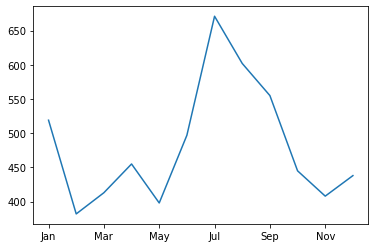

In [72]:
SharkAttack['Mes'].value_counts(sort=False).plot()

In [71]:
SharkAttack['Mes'] = pd.Categorical(SharkAttack['Mes'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

C:\Users\flavi\AppData\Local\Temp/ipykernel_9592/1348416565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SharkAttack['Mes'] = pd.Categorical(SharkAttack['Mes'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


In [74]:
SharkAttackFatal['Mes'] = pd.Categorical(SharkAttackFatal['Mes'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

C:\Users\flavi\AppData\Local\Temp/ipykernel_9592/3740892886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SharkAttackFatal['Mes'] = pd.Categorical(SharkAttackFatal['Mes'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


In [77]:
SharkAttackFatal['Mes'].value_counts(sort=False)

Jan    115
Feb     82
Mar     85
Apr     92
May     84
Jun    103
Jul    131
Aug    101
Sep    117
Oct     78
Nov     85
Dec    131
Name: Mes, dtype: int64

<AxesSubplot:>

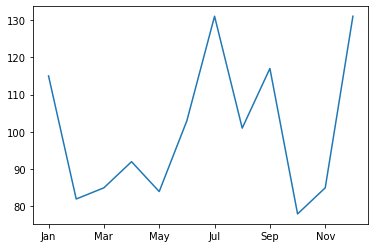

In [76]:
SharkAttackFatal['Mes'].value_counts(sort=False).plot()

In [80]:
print('O mes com maior quantidade de ataque e de ataques fatais é Julho')

O mes com maior quantidade de ataque e de ataques fatais é Julho


O 